# logistic 回归和knn

参考资料：https://blog.csdn.net/c406495762/article/details/77851973

## logistic 利用sklearn实现

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#导入要用到的库
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder #转化哑变量的类
from sklearn.preprocessing import StandardScaler #标准化的类
from sklearn.linear_model import LogisticRegression #logistic回归的类
from sklearn.model_selection import train_test_split #分为测试集和训练集的函数
from sklearn.neighbors import KNeighborsClassifier #knn的类
from sklearn.metrics import confusion_matrix, precision_score,accuracy_score, recall_score, f1_score 
#分类结果的判别方法:混淆矩阵判别准确率,查准率,查全率,f1-score
import matplotlib.pyplot as plt#画图的库

In [3]:
#logistic回归部分
#读入数据
data=pd.read_csv('Smarket.csv')
data.head()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [4]:
#将标签转为0，1形式
le=LabelEncoder()
y=le.fit_transform(data['Direction'].tolist())
X=np.mat([data['Lag1'].tolist(),data['Lag2'].tolist(),data['Lag3'].tolist(),data['Lag4'].tolist(),data['Lag5'].tolist(),data['Volume'].tolist()]).T

In [5]:
#划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## sklearn实现LR

In [6]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print('Logistic回归的截距和系数分别为',clf.intercept_,clf.coef_)
y_pred=clf.predict(X_test) #预测标签直接为0,1

C2= confusion_matrix(y_test, y_pred, labels=[0,1])
print('混淆矩阵')
print(C2) 
print('混淆矩阵判别准确率,查准率,查全率,f1-score依次为')
print(accuracy_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred),f1_score(y_test,y_pred))

Logistic回归的截距和系数分别为 [-0.05829281] [[-0.05698568 -0.06121648  0.04572439 -0.01543955 -0.03044742  0.12184176]]
混淆矩阵
[[ 26 136]
 [ 24 127]]
混淆矩阵判别准确率,查准率,查全率,f1-score依次为
0.48881789137380194 0.4828897338403042 0.8410596026490066 0.6135265700483091


利用留出法建模,将数据以3:1的比例分成训练集和测试机。利用训练集建模,训练出的模型在测试集上的准确率,查全率,查准率,f1-score分别为0.4888 0.4828 0.8410 0.6135，并且得到混淆矩阵

# logistic 自定义函数实现

In [7]:
#新增一列全1的数据作为截距项部分
XX=np.mat([[1]*data.shape[0],data['Lag1'].tolist(),data['Lag2'].tolist(),data['Lag3'].tolist(),data['Lag4'].tolist(),data['Lag5'].tolist(),data['Volume'].tolist()]).T

In [8]:
XX

matrix([[ 1.     ,  0.381  , -0.192  , ..., -1.055  ,  5.01   ,  1.1913 ],
        [ 1.     ,  0.959  ,  0.381  , ..., -2.624  , -1.055  ,  1.2965 ],
        [ 1.     ,  1.032  ,  0.959  , ..., -0.192  , -2.624  ,  1.4112 ],
        ...,
        [ 1.     , -0.955  ,  0.043  , ...,  0.252  , -0.024  ,  1.54047],
        [ 1.     ,  0.13   , -0.955  , ...,  0.422  ,  0.252  ,  1.42236],
        [ 1.     , -0.298  ,  0.13   , ...,  0.043  ,  0.422  ,  1.38254]])

In [9]:
#划分训练集和测试集
XX_train, XX_test, y_train, y_test = train_test_split(XX, y, test_size=0.25, random_state=0)

In [10]:
from numpy import *

#sigmod函数
def sigmoid(inX):
    return 1.0/(1+exp(-inX))

#梯度上升算法
def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)             #训练样本的特征，行为样本，列为特征
    labelMat = mat(classLabels).transpose() #labelMat是列向量
    m,n = shape(dataMatrix)
    
    alpha=0.0001
    
    #迭代次数
    maxCycles =5000
    weights =ones((n,1))
    #在for循环迭代完成后，将返回训练好的回归系数。
    for k in range(maxCycles):  
        h = sigmoid(dataMatrix*weights)
        error = (labelMat - h)  
        #print('中间',dataMatrix.transpose()* error)
        weights = weights+alpha*dataMatrix.transpose()* error 

    return weights

In [11]:
gradAscent(XX_train,np.array(y_train))

matrix([[-0.06049959],
        [-0.05720112],
        [-0.06141587],
        [ 0.0458854 ],
        [-0.01546088],
        [-0.03053716],
        [ 0.12344022]])

## knn

In [12]:
X_train.shape

(937, 6)

In [13]:
y_train.shape

(937,)

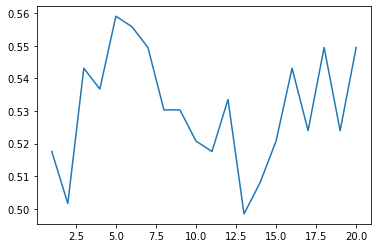

In [14]:
#knn算法
k=20
k_list=[]
score_list=[]

for i in range(k):
    k_list.append(i+1)
    neigh = KNeighborsClassifier(n_neighbors=i+1).fit(np.array(X_train),y_train)
    score_list.append(neigh.score(np.array(X_test),y_test))
    
#plt.cla()
plt.plot(k_list,score_list)   
plt.show()

在knn算法中选取不同的k,得到不同的判别准确率,可以看到k=5时准确率达到最高,所以选取k为5

In [15]:
neigh = KNeighborsClassifier(n_neighbors=k_list[np.argmax(score_list)]).fit(np.array(X_train),y_train)
print('训练集准确率为',neigh.score(np.array(X_train),y_train))

y_pred=neigh.predict(np.array(X_test))
C= confusion_matrix(y_test, y_pred, labels=[0,1])
print('预测集混淆矩阵\n',C)
print('混淆矩阵判别准确率,查准率,查全率,f1-score依次为')
print(accuracy_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred),f1_score(y_test,y_pred))

训练集准确率为 0.6744930629669157
预测集混淆矩阵
 [[84 78]
 [60 91]]
混淆矩阵判别准确率,查准率,查全率,f1-score依次为
0.5591054313099042 0.5384615384615384 0.6026490066225165 0.56875
